In [1]:
import pandas as pd
def draw_graph(res, name="datasets/figures/mutant_prediction_zero_positive.pdf"):
    if type(res) == list:
        print("convert")
        df = pd.DataFrame.from_records(res)
    else:
        df = res
    operator_num = []
    correct_num_each = []
    names = []
    for n, d in df.groupby(['operator'], group_keys=True):
        # print(n)
        # print(len(d))
        names.append( n.split("#")[-1] )
        operator_num.append( len(d) - d["isCorrect"].sum() )
        correct_num_each.append(d["isCorrect"].sum())
        # print(d["isCorrect"].sum())
    # create DataFrame
    print(correct_num_each)
    res_df = pd.DataFrame({'Correct': correct_num_each,
                    'Wrong':operator_num},
                    index=names)
    
    
    # create stacked bar chart for monthly temperatures
    res_df.plot(kind='bar', stacked=True,  alpha=0.7)

    import matplotlib.pyplot as plt
    # labels for x & y axis
    plt.xticks(rotation=80, fontsize=10)
    plt.yticks(fontsize=16)
    plt.xlabel('Operator', fontsize=16)
    plt.ylabel('Prediction Number', fontsize=16)
    plt.tight_layout()
    plt.savefig(name)

In [4]:
import os
os.chdir('GPT4/mutant/')

In [4]:
import pandas as pd
df = pd.read_excel('chatgpt4_zeroshot_predictions.xlsx')

In [74]:

df = pd.DataFrame.from_records(res)
df.to_csv(output_file)
df["isCorrect"].sum()/len(df)
print(len(df))
print(df["isCorrect"].sum()/len(df))



200
0.665


In [5]:
#draw_graph(df)
# draw_graph(res_true, name="gpt4_mutant_prediction_zero_positive.pdf")
#draw_graph(res_false)
#[10, 14, 0, 8, 14]
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, accuracy_score, f1_score, matthews_corrcoef, precision_score
y = df["label"]
y_pre = df["predict"]
acc = accuracy_score(y,  y_pre)
f1 = f1_score(y,  y_pre)
mcc = matthews_corrcoef(y,  y_pre)
recall = recall_score(y,  y_pre)
p = precision_score(y, y_pre)
tn, fp, fn, tp = confusion_matrix(y,  y_pre).ravel()
print(f"TP {tp} FN {fn} \n TN {tn} FP {fp}")
print(f"{sum(y)} {len(y)-sum(y)} ACC {acc} F1 {f1} Mcc {mcc} Recall {recall} Precision {p}")

TP 70 FN 30 
 TN 62 FP 38
100 100 ACC 0.66 F1 0.673076923076923 Mcc 0.3210289415620512 Recall 0.7 Precision 0.6481481481481481


In [83]:
import os
import glob
import tqdm

mutant_folder = "datasets/MutantBench/mutantbench/chatgpt_fewshot"
output_file = "datasets/MutantBench/mutantbench/chatgpt_fewshot_predictions.csv"


res = [ ]
false_folder = os.path.join(mutant_folder, "false")
res_false_one = []
for f in tqdm.tqdm( glob.glob(f"{false_folder}/**/answer.md", recursive=True) ):
    question_file = os.path.dirname(f)+"/question.md"
    answer = open(f).read().strip()
    question = open(question_file).read().strip()
    l = -1
    mid = "mb:mutant#"+os.path.basename(os.path.dirname(f))
    operator = mutant_meta[mid]["https://b2share.eudat.eu/records/153db16ce2f6401298a9aea8b0ab9781/operator"][0]["@id"]
    if answer.lower().startswith("no"):
        l  = 0
    elif answer.lower().startswith("yes"):
        l  = 1
    else:
        print("unknown")
        continue
    res_false_one.append( {"answer":answer, "question":question,  "label":0, "predict":l, "isCorrect":l==0, "operator":operator} )

true_folder = os.path.join(mutant_folder, "true")
res_true_one =[]
for f in tqdm.tqdm( glob.glob( f"{true_folder}/**/answer.md", recursive=True) ):
    question_file = os.path.dirname(f)+"/question.md"
    answer = open(f).read().strip()
    question = open(question_file).read().strip()
    l = -1
    mid = "mb:mutant#"+os.path.basename(os.path.dirname(f))
    operator = mutant_meta[mid]["https://b2share.eudat.eu/records/153db16ce2f6401298a9aea8b0ab9781/operator"][0]["@id"]
    if answer.lower().startswith("no"):
        l  = 0
    elif answer.lower().startswith("yes"):
        l  = 1
    else:
        print("unknown")
        continue
    res_true_one.append( {"answer":answer, "question":question,  "label":1, "predict":l, "isCorrect":l==1, "operator":operator} )
res = res_false_one + res_true_one
import pandas as pd
df_oneshot = pd.DataFrame.from_records(res)
df_oneshot.to_csv(output_file)
df_oneshot["isCorrect"].sum()/len(df_oneshot)
print(len(df_oneshot))
print(df_oneshot["isCorrect"].sum()/len(df_oneshot))

100%|██████████| 100/100 [00:00<00:00, 10984.17it/s]

200
0.63


In [8]:

df_oneshot = pd.read_excel('chatgpt4_fewshot_predictions.xlsx')

In [9]:
#draw_graph(df)
# draw_graph(res_true_one, name="datasets/figures/mutant_prediction_one_positive.pdf")
#draw_graph(res_false)
#[10, 14, 0, 8, 14]
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, accuracy_score, f1_score, matthews_corrcoef, precision_score
y = df_oneshot["label"]
y_pre = df_oneshot["predict"]
acc = accuracy_score(y,  y_pre)
f1 = f1_score(y,  y_pre)
mcc = matthews_corrcoef(y,  y_pre)
recall = recall_score(y,  y_pre)
p = precision_score(y, y_pre)
tn, fp, fn, tp = confusion_matrix(y,  y_pre).ravel()
print(f"TP {tp} FN {fn} \n TN {tn} FP {fp}")
print(f"{sum(y)} {len(y)-sum(y)} ACC {acc} F1 {f1} Mcc {mcc} Recall {recall} Precision {p}")

TP 55 FN 45 
 TN 59 FP 41
100 100 ACC 0.57 F1 0.5612244897959183 Mcc 0.14011213457945124 Recall 0.55 Precision 0.5729166666666666


/tmp/ipykernel_410083/2428771265.py:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for n, d in df_oneshot.groupby(['operator'], group_keys=True):


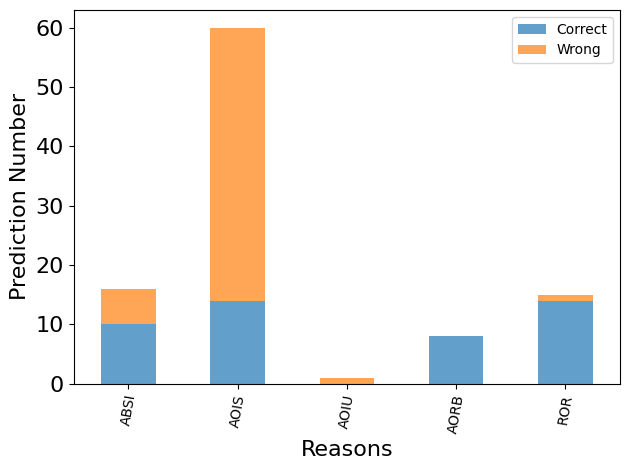

In [40]:
draw_graph(df)

In [ ]:
import os
os.chdir("all_datasets/mutant_test/")
print(os.getcwd() )

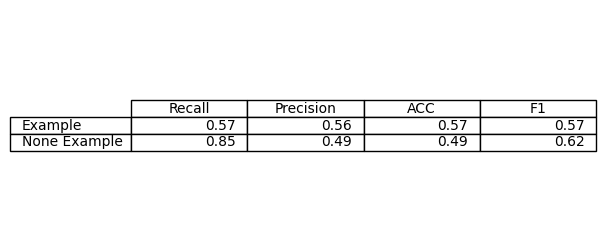

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 
data = {
    "Recall": [0.57, 0.85],  # 
    "Precision": [0.56, 0.49],  # 
    "ACC": [0.57, 0.49],    # F1
    "F1": [0.57, 0.62]
}

# DataFrame
df = pd.DataFrame(data, index=["Example", "None Example"])

# 
fig, ax = plt.subplots(figsize=(6, 3))  # 
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center')

plt.savefig('performance_starchat.png')
plt.show()


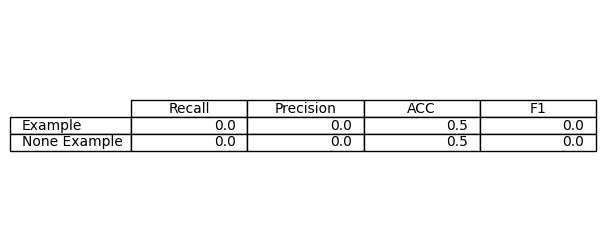

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 
data = {
    "Recall": [0, 0],  # 
    "Precision": [0, 0],  # 
    "ACC": [0.5, 0.5],    # F1
    "F1": [0, 0]
}

# DataFrame
df = pd.DataFrame(data, index=["Example", "None Example"])

# 
fig, ax = plt.subplots(figsize=(6, 3))  # 
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center')

plt.savefig('performance_codellama.png')
plt.show()


In [ ]:
# ACC 0.66 F1 0.673076923076923 Mcc 0.3210289415620512 Recall 0.7 Precision 0.6481481481481481
# ACC 0.57 F1 0.5612244897959183 Mcc 0.14011213457945124 Recall 0.55 Precision 0.5729166666666666

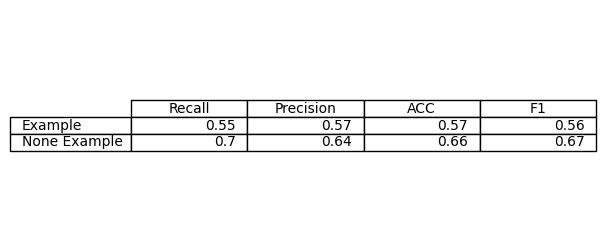

In [13]:
import matplotlib.pyplot as plt
# 
data = {
    "Recall": [0.55, 0.70],  # 
    "Precision": [0.57, 0.64],  # 
    "ACC": [0.57, 0.66],    # F1
    "F1": [0.56, 0.67]
}

# DataFrame
df = pd.DataFrame(data, index=["Example", "None Example"])

# 
fig, ax = plt.subplots(figsize=(6, 3))  # 
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center')

plt.savefig('performance_gpt4.png')
plt.show()


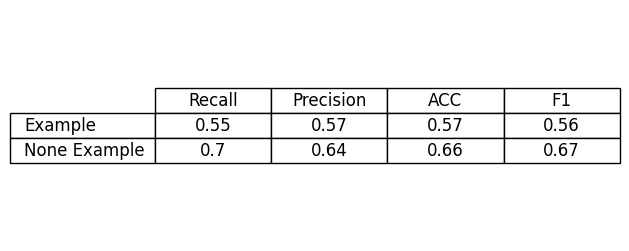

In [5]:
from matplotlib import pyplot as plt
import pandas as pd
confusion_matrix = pd.DataFrame(
    {"Recall": [0.55, 0.70],  # 
    "Precision": [0.57, 0.64],  # 
    "ACC": [0.57, 0.66],    # F1
    "F1": [0.56, 0.67]},
    index=['Example', 'None Example']
)
    
# 
fig, ax = plt.subplots(figsize=(6, 3))  # 
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=confusion_matrix.values, colLabels=confusion_matrix.columns,
                 rowLabels=confusion_matrix.index, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)  # 
table.scale(1, 1.5)  # 

# 
plt.savefig('gpt4_performance.png', bbox_inches='tight', pad_inches=0.05)
plt.show()
plt.close()
